In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
x_train = x_train/255
x_test = x_test/255
## This is type of scaling of values (Min-Max scaling)

In [5]:
## Here x is the image of numbers in the form of array 
## Here y is the resultant number from the image
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

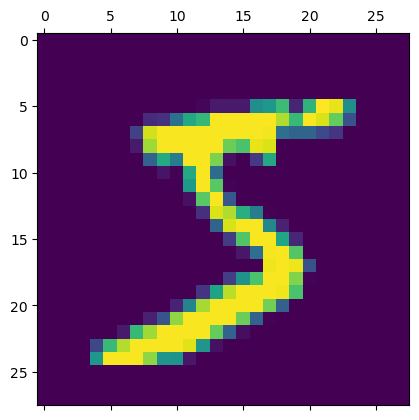

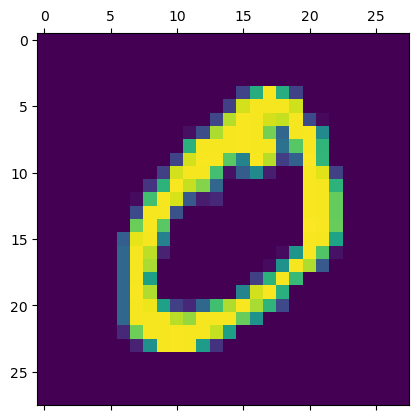

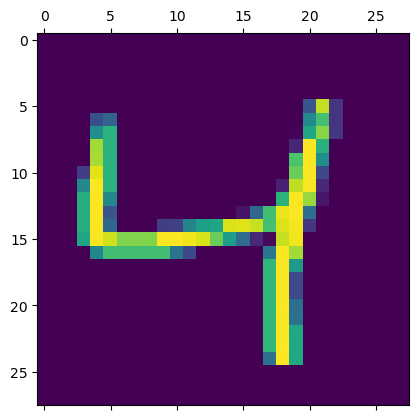

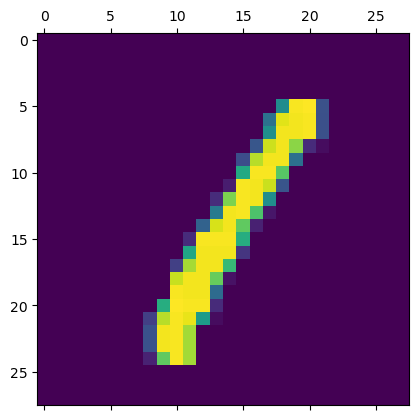

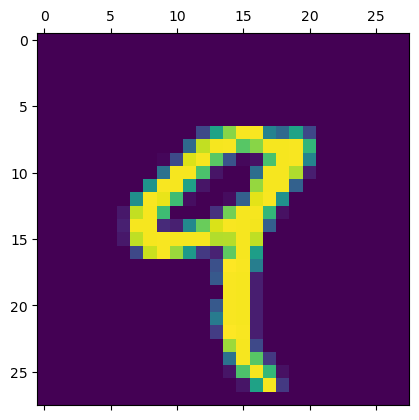

In [6]:
## For plotting in the form of image
for i in range(5):
    plt.matshow(x_train[i])

In [7]:
## For flattening use pandas reshape

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_trainFlat = x_train.reshape(len(x_train),x_train.shape[1]*x_train.shape[2])

In [10]:
x_testFlat = x_test.reshape(len(x_test),x_test.shape[1]*x_test.shape[2])

In [11]:
## Now this will make the array as single dimension array

In [12]:
## Use Keras.sequenial for making a stack 

In [15]:
## Now we are defining a neural network model using keras
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ## In this we are adding one input layer for the neural network
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_trainFlat, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 4s 1ms/step - loss: 0.4716 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9253


In [16]:
model.evaluate(x_testFlat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9247


[0.26637324690818787, 0.9247000217437744]

In [17]:
newPredict = model.predict(x_testFlat)

313/313 [==============================] - 0s 1ms/step


In [18]:
np.argmax(newPredict[1])

2

In [19]:
yPredicted = [np.argmax(i) for i in newPredict]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=yPredicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    5,   11,    3,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,   11,  922,   18,    9,    5,   12,   11,   37,    4],
       [   2,    0,   16,  930,    0,   23,    2,   13,   14,   10],
       [   1,    1,    2,    2,  911,    0,   12,    4,    8,   41],
       [   7,    3,    3,   35,   10,  781,   15,    7,   23,    8],
       [   8,    3,    6,    1,    7,   13,  916,    2,    2,    0],
       [   1,    5,   21,    6,    4,    0,    0,  952,    3,   36],
       [   6,   11,    5,   30,    9,   36,    9,   13,  841,   14],
       [  10,    7,    1,   11,   25,    7,    0,   22,    4,  922]])>

Text(95.72222222222221, 0.5, 'Truth')

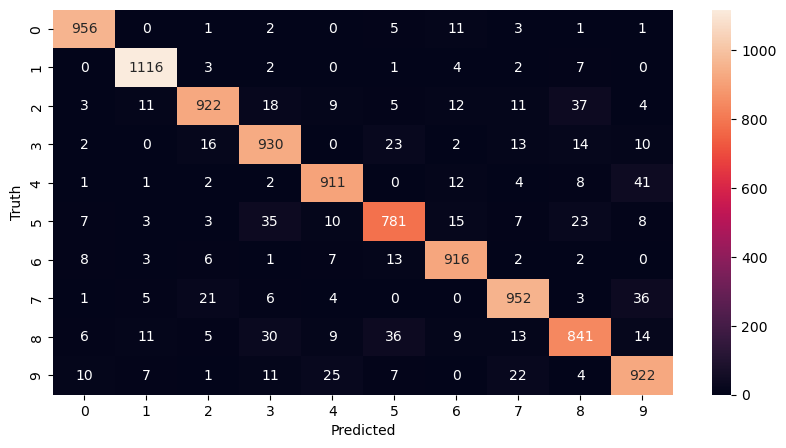

In [21]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
## Now making another neural network by adding a hidden layer in it
modelHid = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
    ## Now in this we have added 2 hidden layers in it
])

modelHid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelHid.fit(x_trainFlat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3794 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1321 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0921 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9828


In [23]:
modelHid.evaluate(x_testFlat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1087 - accuracy: 0.9685


[0.10866855829954147, 0.968500018119812]